@author Joubert Alexandrino de Souza
@version 2020-11-24

-----------------------------------------------
# Resolvendo um problema de regressão
-----------------------------------------------

Em um jupyter notebook:

    1 - Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;
    2 - Treine um modelo da classe LinearRegression do scikit-learn com toda a base;
    3 - Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;
    4 - Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.

Suba seu jupyter notebook para o GitHub e disponibilize o link da tarefa (não do repositório).

In [125]:
#Importa as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ajustes
%matplotlib inline

In [126]:
# 1 - Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

'''
Dataset
Beer Consumption - Sao Paulo

Disponível em
https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

Descrição
Beer is one of the most democratic and consumed drinks in the world. Not without reason, it is perfect for almost every situation, from happy hour to large wedding parties. If you just think about it, you already feel like having a beer, you’re not alone.
The truth is that around the world, thousands of people consume the drink regularly and also in different situations. But have you ever stopped to think about which countries are the most consuming beer in the world? The first one that came to your head was Germany? Well, know that it is not so.
The answer to that question is resounding: the Czech Republic. According to research by the Japanese beverage company Kirin, the country has topped the per capita beer drinking table for 23 consecutive years.
In 2015, the most recent year for which statistics are available, the Czechs drank 142.4 litres per person. That’s the equivalent of 250 pints — or one every 35 hours. But, given that minors are unlikely to be contributing to that figure, it’s safe to assume that the average beer drinker probably guzzles quite a bit more.
Snapping at the Czech Republic’s heels are the usual pretenders. Austria and Germany come third and fourth, Poland sixth and Ireland seventh.There are some surprises, however. In second place is the Seychelles, a lofty ranking which we’ll put down to the hot climate and the large number of holidaymakers.

The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with period of one year.
'''

dados = pd.read_csv("consumo-cerveja.csv", sep=';')
dados.head()


,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [127]:
# Separa os o target das variáveis explicatórias escolhidas para análise
X = dados[['temp_max', 'chuva', 'fds']]
y = dados['consumo']

#Imprime o tamanho das coleções
print("X = ", X.shape)
print("y = ", y.shape)

X =  (365, 3)
y =  (365,)


In [128]:
# 2 - Treine um modelo da classe LinearRegression do scikit-learn com toda a base
modelo = LinearRegression()
modelo.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
# 3 - Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado

ypred = modelo.predict(X)
mse = mean_squared_error(y, ypred).round(4)
print("\nValor de MSE = ", mse)
print('R² = {}'.format(modelo.score(X, y).round(2)))


Valor de MSE =  5353164.4199
R² = 0.72




Intercept =  6432.085193414441
Coefs =  [ 668.54267543  -57.48914526 5184.0826939 ] 




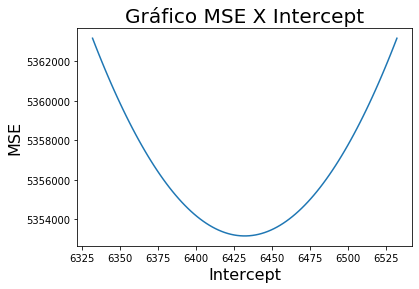

In [130]:
# 4 - Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.

#Exibe o valor do intercept
print("\n\nIntercept = ", modelo.intercept_)
print("Coefs = ", modelo.coef_,"\n\n")

#Configura a exibição do gráfico
delta = 100
start = modelo.intercept_ - delta
stop  = modelo.intercept_ + delta
num = 100

pontosX = np.linspace(start , stop, num).reshape(-1,1)
pontosY = np.empty(pontosX.shape[0])

#Calcula os dados para exibir o gráfico
for i in range(pontosY.shape[0]):
    
    modelo.intercept_ = pontosX[i]
    ypred = modelo.predict(X)
    pontosY[i] = mean_squared_error(y, ypred)

#Plota o Gráfico
fig, ax = plt.subplots()
ax.set_title('Gráfico MSE X Intercept', fontsize=20)
ax.set_ylabel('MSE', fontsize=16)
ax.set_xlabel('Intercept', fontsize=16)
ax = plt.plot(pontosX, pontosY)